# Final Project - Data Analysis with Python
![Olympic Rings](https://idrottsforum.org/wp-content/uploads/2019/02/winter-olympics.jpg)

hey there! it looks you're curious about the results of this project, that's awesome !!!! let me take you on a journey through the participation of Argentine women in the history of the Olympic Games. it's gonna be exciting 🚀🚀

Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import os
import zipfile
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap

In [2]:
!pip install plotly

In [2]:
athletes = pd.read_csv('athlete_events.csv')
noc_regions = pd.read_csv("noc_regions.csv")
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
south_american_countries = [
    "ARG", "BOL", "BRA", "CHI", "COL", "ECU", "PAR", "PER", "URU", "VEN"
]

# Filter Latin American countries in athlete_events
latin_american_data = athletes[athletes['NOC'].isin(south_american_countries)]

# Agrupar por NOC y año, y calcular estadísticas
grouped = latin_american_data.groupby(['NOC', 'Year']).agg(
    total_athletes=('ID', 'count'),
    female_athletes=('Sex', lambda x: (x == 'F').sum())
).reset_index()

# Calcular porcentaje de participación femenina
grouped['female_percentage'] = (grouped['female_athletes'] / grouped['total_athletes']) * 100

# Visualización preliminar
print(grouped)

     NOC  Year  total_athletes  female_athletes  female_percentage
0    ARG  1900               1                0           0.000000
1    ARG  1908               1                0           0.000000
2    ARG  1920               1                0           0.000000
3    ARG  1924             109                0           0.000000
4    ARG  1928             108                0           0.000000
..   ...   ...             ...              ...                ...
214  VEN  2006               1                0           0.000000
215  VEN  2008             126               58          46.031746
216  VEN  2012              85               36          42.352941
217  VEN  2014               1                0           0.000000
218  VEN  2016             105               29          27.619048

[219 rows x 5 columns]


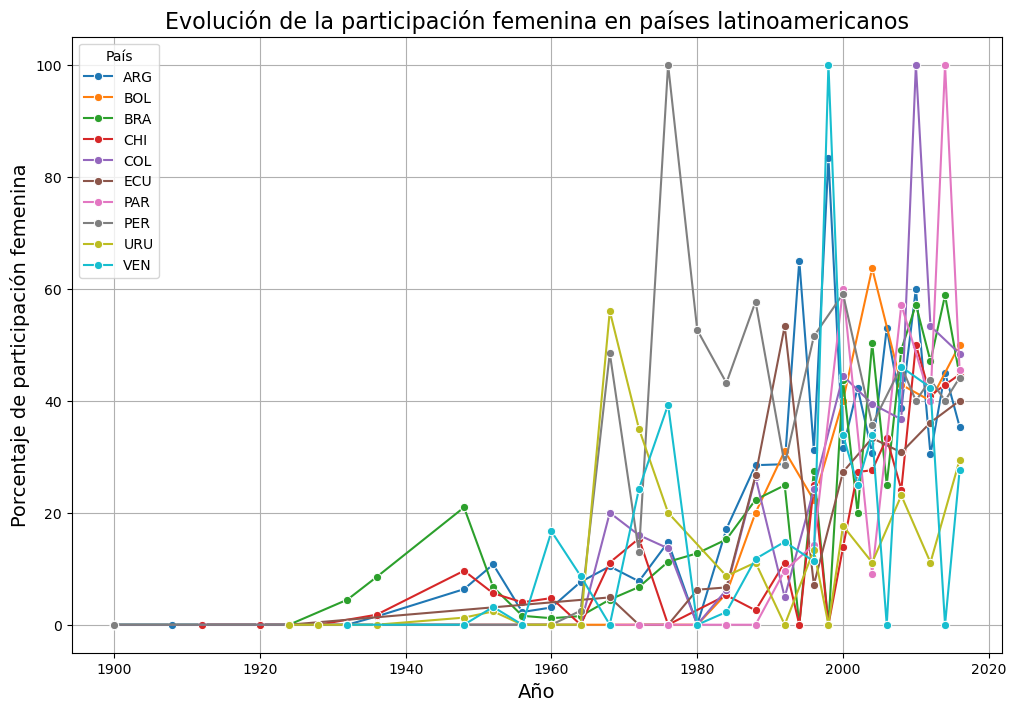

In [5]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=grouped,
    x='Year', y='female_percentage', hue='NOC',
    marker='o'
)
plt.title("Evolución de la participación femenina en países latinoamericanos", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Porcentaje de participación femenina", fontsize=14)
plt.legend(title="País")
plt.grid(True)
plt.show()

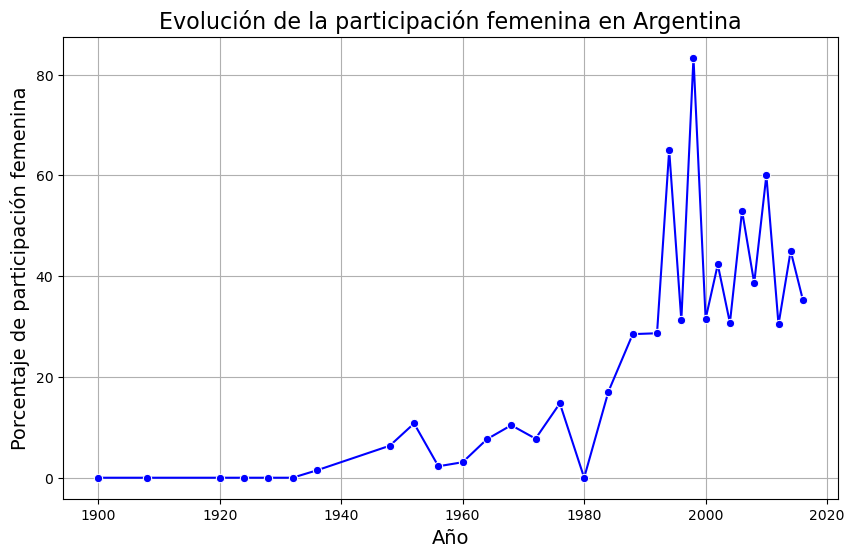

In [6]:
# Filtrar solo los datos de Argentina
argentina_data = grouped[grouped['NOC'] == 'ARG']

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=argentina_data,
    x='Year', y='female_percentage',
    marker='o', color='blue'
)
plt.title("Evolución de la participación femenina en Argentina", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Porcentaje de participación femenina", fontsize=14)
plt.grid(True)
plt.show()

In [7]:
# Define paths and directories: Specifies the archive paths and folders into which the Internet and country data will be extracted.
countries_shape_zip = '110m_cultural.zip'
countries_shape_extract_dir = '110m_cultural'

# Unzip files if not already unzipped: If the extraction folders don't exist yet, the code decompresses the zip files and saves the contents in the specified directories.
#if not os.path.exists(shapefile_extract_dir):
 #   with zipfile.ZipFile(countries_shape_zip, 'r') as zip_ref:
  #      zip_ref.extractall(countries_shape_extract_dir)

# Load shapefile and filter for South America: 
# Defines the path to the shp file of the countries and loads it as a GeoDataFrame (gdf).
# Filtrar atletas femeninas
female_athletes = athletes[athletes['Sex'] == 'F']

# Merge entre female_athletes y noc_regions basado en el código NOC
merged_data = female_athletes.merge(noc_regions, on='NOC', how='left')

# Contar atletas femeninas por región
female_count_by_region = merged_data.groupby('region').size().reset_index(name='female_count')

# Cargar y filtrar el shapefile de países de América del Sur
countries_shape_path = os.path.join(countries_shape_extract_dir, 'ne_110m_admin_0_countries.shp')
gdf = gpd.read_file(countries_shape_path)

south_america_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
    'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 
    'Uruguay', 'Venezuela'
]
gdf_continent = gdf[gdf['ADMIN'].isin(south_america_countries)]

# Merge entre el GeoDataFrame y el conteo de atletas femeninas
gdf_continent = gdf_continent.merge(
    female_count_by_region, 
    left_on='ADMIN', 
    right_on='region', 
    how='left'
)

# Rellenar valores faltantes con 0
gdf_continent['female_count'] = gdf_continent['female_count'].fillna(0)

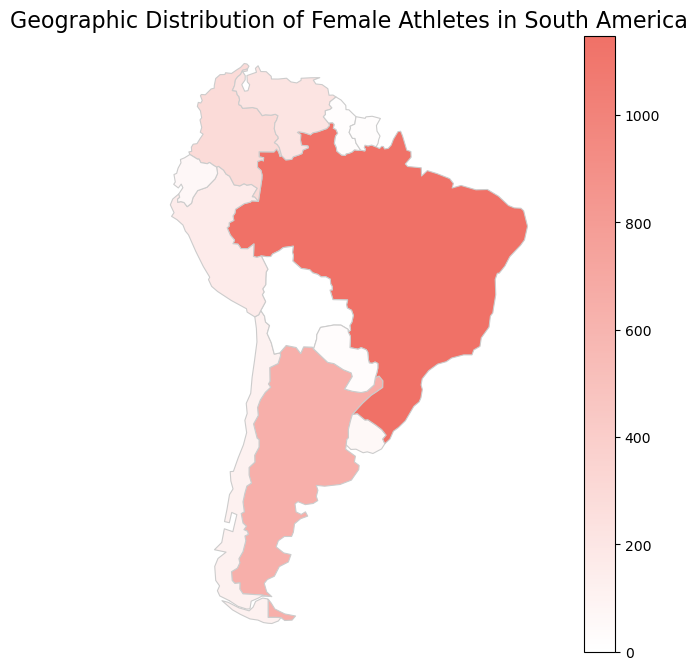

In [27]:
# Crea una escala de colores personalizada basada en F07167
base_color = '#F07167'
custom_cmap = LinearSegmentedColormap.from_list('custom', ['#FFFFFF', base_color])

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_continent.plot(
    column='female_count',
    cmap=custom_cmap,
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)
ax.set_title("Geographic Distribution of Female Athletes in South America", fontsize=16)
ax.axis('off')
plt.show()

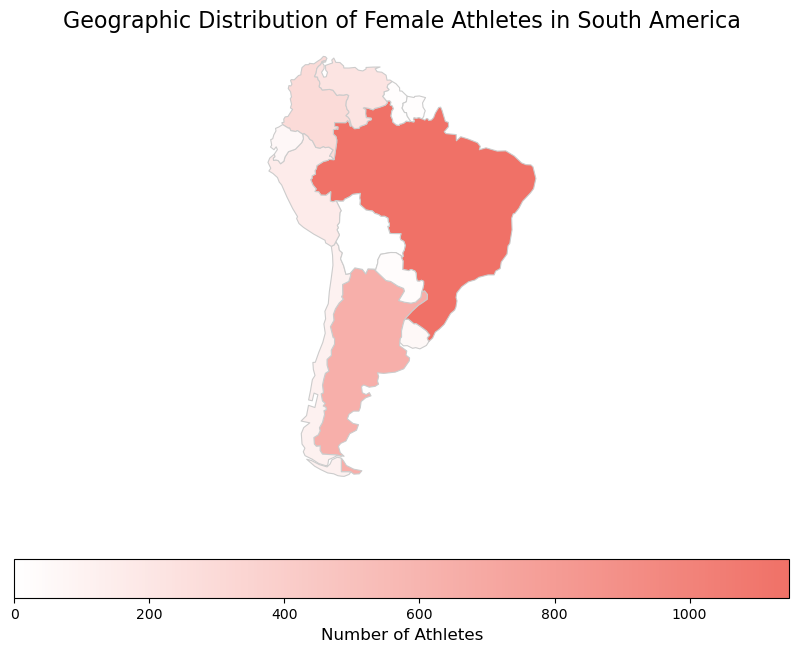

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Crear una escala de colores personalizada basada en F07167
base_color = '#F07167'
custom_cmap = LinearSegmentedColormap.from_list('custom', ['#FFFFFF', base_color])

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_continent.plot(
    column='female_count',
    cmap=custom_cmap,
    linewidth=0.8,
    edgecolor='0.8',
    legend=False,
    ax=ax
)

# Personalizar la barra de colores
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=mpl.colors.Normalize(vmin=gdf_continent['female_count'].min(), vmax=gdf_continent['female_count'].max()))
sm._A = []  # Esto es necesario para que funcione el colorbar

# Agregar colorbar horizontal debajo del mapa
cbar = fig.colorbar(sm, orientation='horizontal', ax=ax, pad=0.1)
cbar.set_label('Number of Athletes', fontsize=12)

# Título del mapa
ax.set_title("Geographic Distribution of Female Athletes in South America", fontsize=16)

# Ocultar ejes
ax.axis('off')

# Mostrar el gráfico
plt.show()


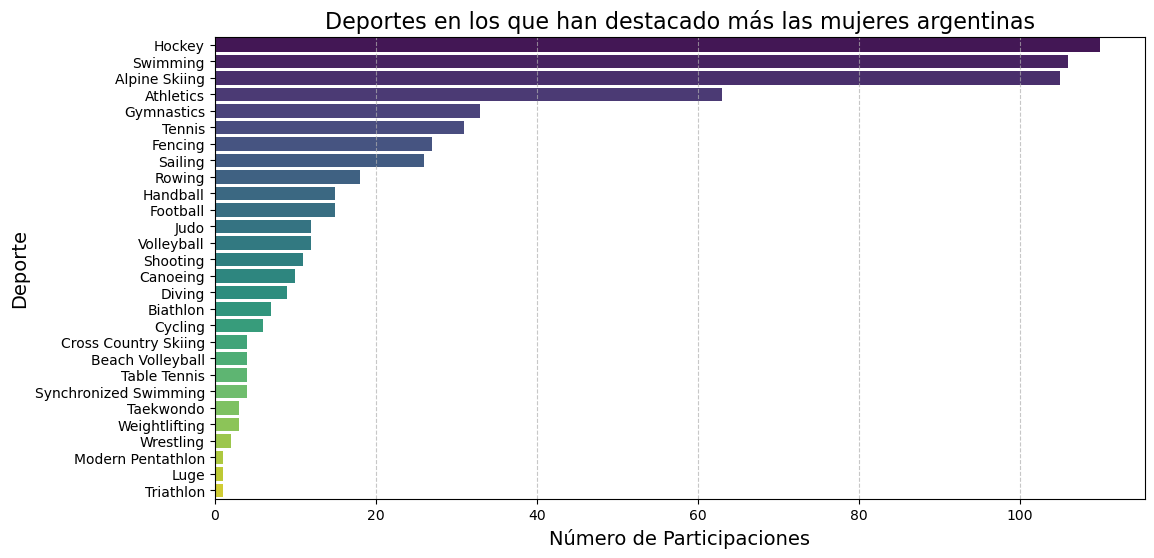

In [9]:
# Filtrar datos de mujeres argentinas
female_argentines = athletes[(athletes['Sex'] == 'F') & (athletes['NOC'] == 'ARG')]

# Agrupar por deporte y contar participaciones
sports_participation = female_argentines.groupby('Sport').size().reset_index(name='count')

# Filtrar deportes con al menos una participación
sports_participation = sports_participation[sports_participation['count'] > 0]

# Ordenar los deportes por cantidad de participaciones
sports_participation = sports_participation.sort_values(by='count', ascending=False)

# Visualización del resultado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sports_participation,
    x='count', y='Sport',
    palette='viridis',
    hue='Sport',  # Asigna `sport` como `hue`
    dodge=False,  # Para evitar barras divididas
    legend=False
)
plt.title("Deportes en los que han destacado más las mujeres argentinas", fontsize=16)
plt.xlabel("Número de Participaciones", fontsize=14)
plt.ylabel("Deporte", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Filtrar datos de Argentina y medallas ganadas
arg_medals = athletes[(athletes['NOC'] == 'ARG') & (athletes['Medal'].notna())]

# Resumen por tipo de medalla
medals_by_type = arg_medals['Medal'].value_counts()

# Resumen por género
medals_by_gender = arg_medals['Sex'].value_counts()

# Resumen por género y tipo de medalla
medals_by_gender_type = arg_medals.groupby(['Sex', 'Medal']).size().unstack()

print("Cantidad total de medallas por tipo:")
print(medals_by_type)
print("\nCantidad total de medallas por género:")
print(medals_by_gender)
print("\nCantidad de medallas por género y tipo:")
print(medals_by_gender_type)

Cantidad total de medallas por tipo:
Medal
Silver    92
Gold      91
Bronze    91
Name: count, dtype: int64

Cantidad total de medallas por género:
Sex
M    201
F     73
Name: count, dtype: int64

Cantidad de medallas por género y tipo:
Medal  Bronze  Gold  Silver
Sex                        
F          37     2      34
M          54    89      58


  Sex   Medal  count
0   F  Bronze     37
1   F    Gold      2
2   F  Silver     34
3   M  Bronze     54
4   M    Gold     89
5   M  Silver     58
Nodos: ['F', 'M', 'Bronze', 'Gold', 'Silver']
Índices: {'F': 0, 'M': 1, 'Bronze': 2, 'Gold': 3, 'Silver': 4}
Sources: [0, 0, 0, 1, 1, 1]
Targets: [2, 3, 4, 2, 3, 4]
Values: 0    37
1     2
2    34
3    54
4    89
5    58
Name: count, dtype: int64


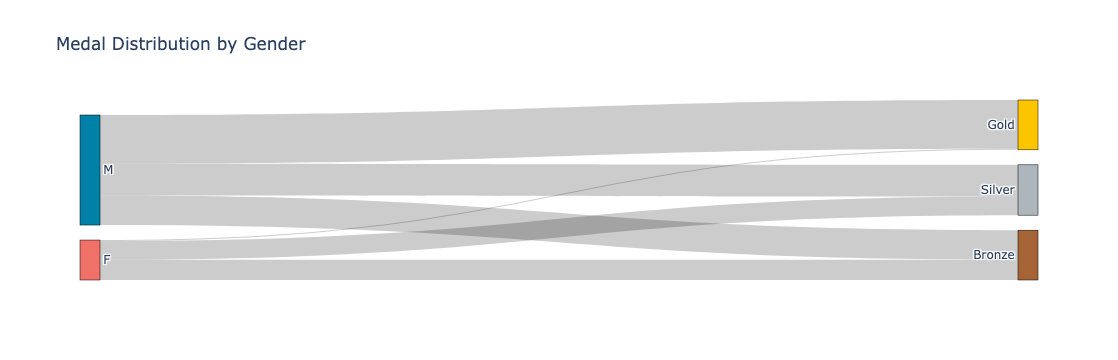

In [31]:
# Filtrar datos de Argentina y medallas ganadas
arg_medals = athletes[(athletes['NOC'] == 'ARG') & (athletes['Medal'].notna())]

# Agrupar por género y tipo de medalla
medal_distribution = arg_medals.groupby(['Sex', 'Medal']).size().reset_index(name='count')

# Verificar los datos agrupados
print(medal_distribution)

# Crear listas de nodos y enlaces para Sankey
genders = medal_distribution['Sex'].unique()
medals = medal_distribution['Medal'].unique()

# Nodos: géneros y tipos de medalla
nodes = list(genders) + list(medals)
print("Nodos:", nodes)

# Índices para los nodos
node_indices = {node: i for i, node in enumerate(nodes)}
print("Índices:", node_indices)

# Crear las conexiones entre nodos (source, target, value)
sources = [node_indices[gender] for gender in medal_distribution['Sex']]
targets = [node_indices[medal] for medal in medal_distribution['Medal']]
values = medal_distribution['count']

# Verificar los enlaces
print("Sources:", sources)
print("Targets:", targets)
print("Values:", values)

node_colors = []
for node in nodes:
    if node == 'M':
        node_colors.append('#0081A7')  
    elif node == 'F':
        node_colors.append('#F07167')  
    elif node == 'Gold':
        node_colors.append('#fdc500')  
    elif node == 'Silver':
        node_colors.append('#adb5bd')  
    elif node == 'Bronze':
        node_colors.append('#a56336')  
    else:
        node_colors.append('#a3a3a3')  

# Graficar el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text="Medal Distribution by Gender",
    font_size=12
)

# Mostrar el gráfico
fig.show()


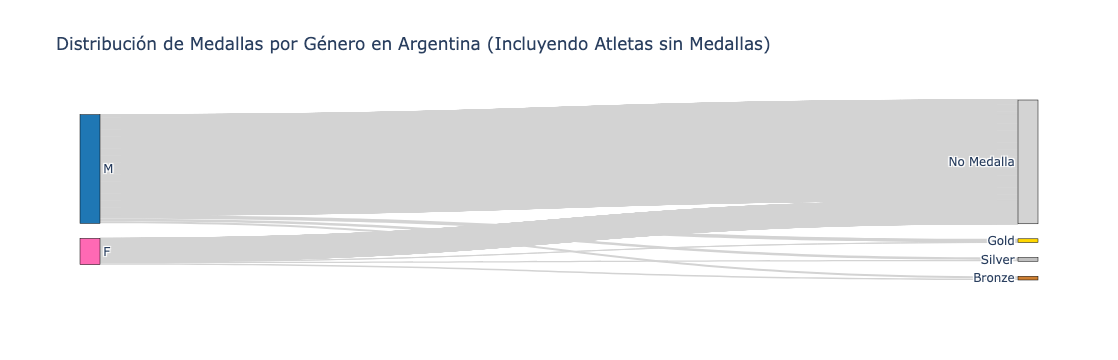

In [19]:
# Filtrar datos de Argentina con y sin medallas
arg_medals = athletes[athletes['NOC'] == 'ARG']

# Filtrar atletas que ganaron medallas
arg_medals_with_medals = arg_medals[arg_medals['Medal'].notna()]

# Filtrar atletas que no ganaron medallas
arg_medals_no_medals = arg_medals[arg_medals['Medal'].isna()]

# Agrupar por género y tipo de medalla
medal_distribution = arg_medals_with_medals.groupby(['Sex', 'Medal']).size().reset_index(name='count')

# Crear listas de nodos y enlaces para Sankey
genders = medal_distribution['Sex'].unique()
medals = medal_distribution['Medal'].unique()

# Nodo adicional para "No Medalla"
nodes = list(genders) + list(medals) + ['No Medalla']

# Índices para los nodos
node_indices = {node: i for i, node in enumerate(nodes)}

# Crear las conexiones entre nodos (source, target, value)
sources = []

# Atletas con medallas
sources += [node_indices[gender] for gender in medal_distribution['Sex']]
targets = [node_indices[medal] for medal in medal_distribution['Medal']]
values = medal_distribution['count'].tolist()

# Atletas sin medallas: Conectar desde el género hacia 'No Medalla'
sources_no_medals = [node_indices[gender] for gender in arg_medals_no_medals['Sex']]
targets_no_medals = [node_indices['No Medalla']] * len(arg_medals_no_medals)
values_no_medals = [1] * len(arg_medals_no_medals)  # Asignar 1 a los atletas sin medalla

# Añadir los atletas sin medallas a las listas de enlaces
sources += sources_no_medals
targets += targets_no_medals
values += values_no_medals

# Colores para los nodos: Asignar colores específicos
node_colors = []
for node in nodes:
    if node == 'M':
        node_colors.append('#1f77b4')  # Azul para masculino
    elif node == 'F':
        node_colors.append('#ff69b4')  # Rosa para femenino
    elif node == 'Gold':
        node_colors.append('#ffd700')  # Dorado para medallas de oro
    elif node == 'Silver':
        node_colors.append('#c0c0c0')  # Plateado para medallas de plata
    elif node == 'Bronze':
        node_colors.append('#cd7f32')  # Bronce para medallas de bronce
    elif node == 'No Medalla':
        node_colors.append('#d3d3d3')  # Gris para atletas sin medallas
        
link_colors = []
for source in sources:
    if nodes[source] == 'M':
        link_colors.append('#1f77b4')  # Azul para masculino
    elif nodes[source] == 'F':
        link_colors.append('#ff69b4')  # Rosa para femenino
    else:
        link_colors.append('#d3d3d3')  # Gris para los que no tienen medallas

# Graficar el diagrama Sankey con los colores personalizados
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=node_colors  # Asigna los colores aquí
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='#d3d3d3',
    )
)])

fig.update_layout(
    title_text="Distribución de Medallas por Género en Argentina (Incluyendo Atletas sin Medallas)",
    font_size=12
)

fig.show()


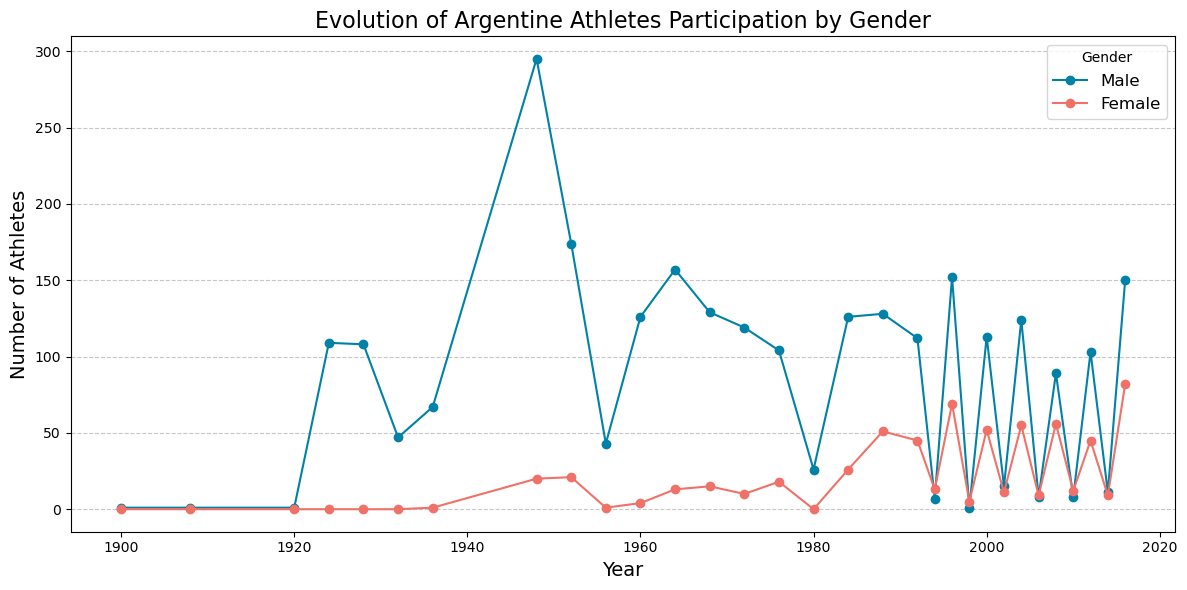

In [30]:
# Filtrar datos de Argentina
argentina_athletes = athletes[athletes['NOC'] == 'ARG']

# Agrupar por año y género para contar los atletas
participation = argentina_athletes.groupby(['Year', 'Sex']).size().reset_index(name='count')

# Crear un pivot table para facilitar el graficado
participation_pivot = participation.pivot(index='Year', columns='Sex', values='count').fillna(0)

# Renombrar las columnas para mayor claridad
participation_pivot.rename(columns={'F': 'Female', 'M': 'Male'}, inplace=True)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(participation_pivot.index, participation_pivot['Male'], label='Male', color='#0081A7', marker='o')
plt.plot(participation_pivot.index, participation_pivot['Female'], label='Female', color='#F07167', marker='o')

# Personalizar el gráfico
plt.title('Evolution of Argentine Athletes Participation by Gender', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

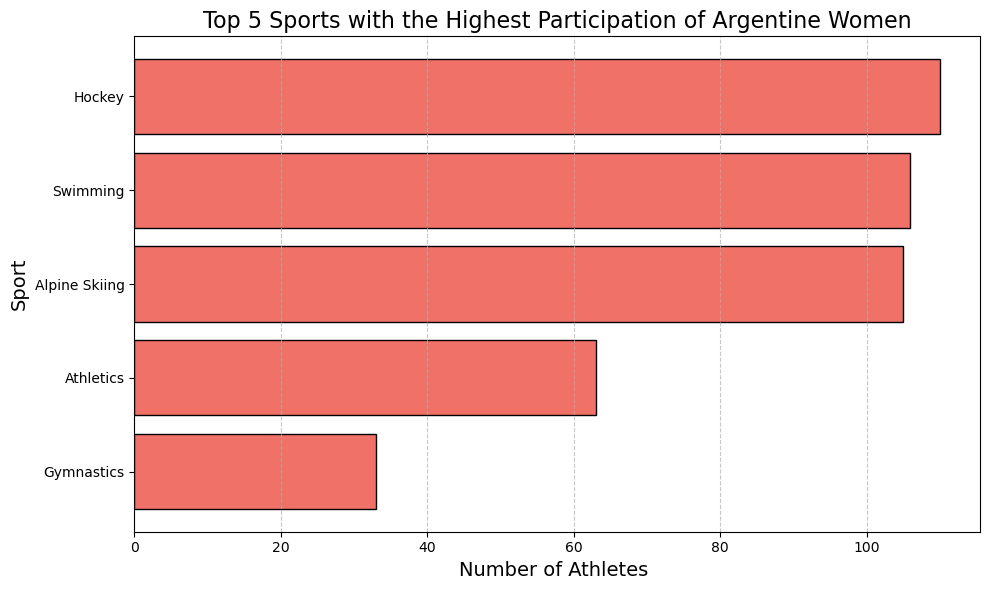

In [3]:
# Filtrar datos para atletas femeninas de Argentina
female_athletes_arg = athletes[(athletes['NOC'] == 'ARG') & (athletes['Sex'] == 'F')]

# Agrupar por deporte y contar la cantidad de participantes
sports_count = female_athletes_arg.groupby('Sport').size().reset_index(name='count')

# Ordenar por cantidad de participantes y seleccionar el top 5
top5_sports = sports_count.sort_values(by='count', ascending=False).head(5)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(top5_sports['Sport'], top5_sports['count'], color='#F07167', edgecolor='black')

# Personalizar el gráfico
plt.title('Top 5 Sports with the Highest Participation of Argentine Women', fontsize=16)
plt.xlabel('Number of Athletes ', fontsize=14)
plt.ylabel('Sport', fontsize=14)
plt.gca().invert_yaxis()  # Invertir el orden para que el top esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [11]:
# Filtrar datos para atletas argentinos que ganaron medallas
medalist_arg = athletes[(athletes['NOC'] == 'ARG') & (athletes['Sex'] == 'F') & (athletes['Medal'].notnull())]

# Agrupar por nombre y contar medallas
top_athletes = (
    medalist_arg.groupby('Name')
    .size()
    .reset_index(name='medal_count')
    .sort_values(by='medal_count', ascending=False)
    .head(5)
)

# Mostrar los resultados
print("Top 5 atletas argentinos con más medallas:")
print(top_athletes)


Top 5 atletas argentinos con más medallas:
                                         Name  medal_count
18                Luciana Paula "Lucha" Aymar            4
28  Mara de la Paz "Maripi" Hernndez Margalot            3
0               Agustina Soledad "Sole" Garca            3
23           Mara Magdalena Aicega Amicarelli            3
24             Mara Mercedes "Mechi" Margalot            3


/var/folders/1z/79fnb0h51z72gb2_9t_sk9mr0000gn/T/ipykernel_3468/3311691279.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




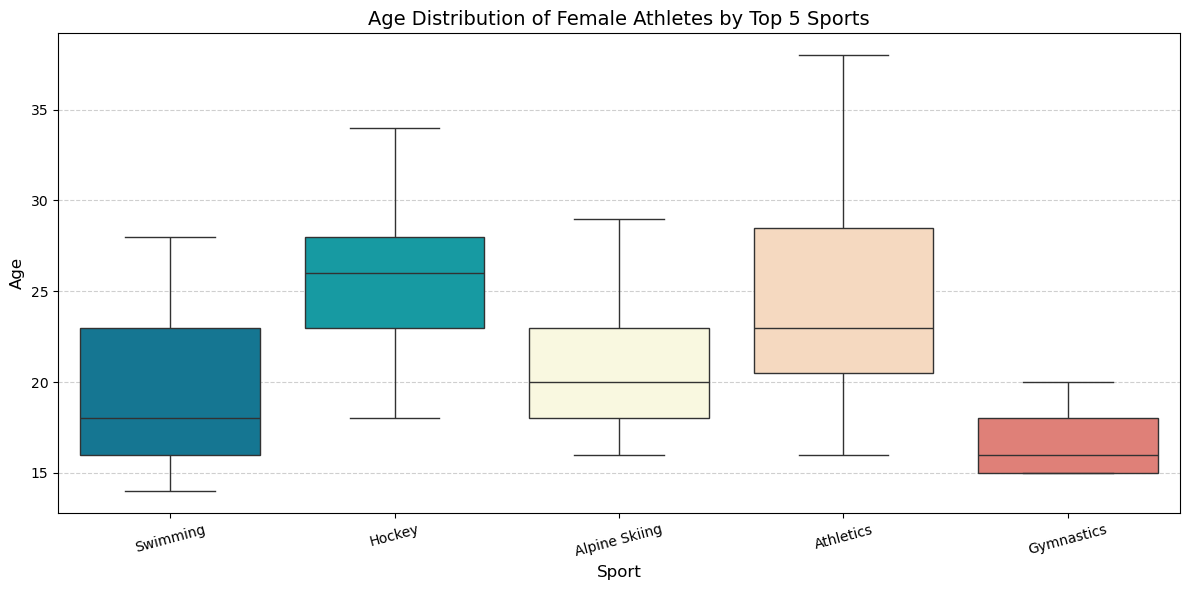

In [24]:
# Filtrar datos para atletas femeninas argentinas
female_athletes_arg = athletes[(athletes['NOC'] == 'ARG') & (athletes['Sex'] == 'F')]

# Identificar los 5 deportes con mayor participación femenina
top5_sports = (
    female_athletes_arg['Sport']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Filtrar los datos solo para esos deportes
top5_female_athletes = female_athletes_arg[female_athletes_arg['Sport'].isin(top5_sports)]

# Crear el boxplot
custom_palette = ['#0081A7', '#00AFB9', '#FDFCDC', '#FED9B7', '#F07167']

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=top5_female_athletes,
    x='Sport',
    y='Age',
    palette=custom_palette
)

# Personalizar el gráfico
plt.title('Age Distribution of Female Athletes by Top 5 Sports', fontsize=14)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


/var/folders/1z/79fnb0h51z72gb2_9t_sk9mr0000gn/T/ipykernel_3468/278478131.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




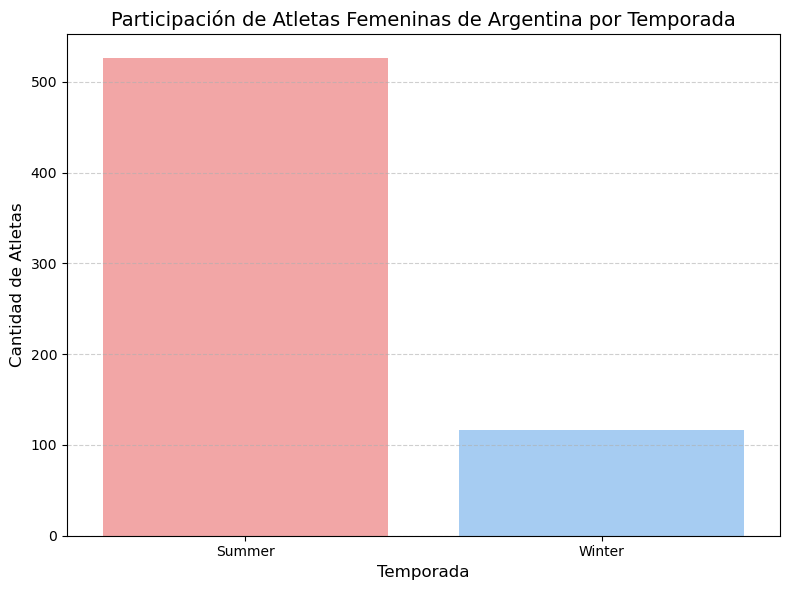

In [19]:
# Filtrar datos para atletas femeninas argentinas
female_athletes_arg = athletes[(athletes['NOC'] == 'ARG') & (athletes['Sex'] == 'F')]

# Agrupar por temporada y contar la cantidad de atletas
season_counts = (
    female_athletes_arg.groupby('Season')
    .size()
    .reset_index(name='Count')  # Renombrar la columna de conteo
)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=season_counts,
    x='Season',
    y='Count',
    palette=['#FF9999', '#99CCFF']  # Colores para invierno y verano
)

# Personalizar el gráfico
plt.title('Participación de Atletas Femeninas de Argentina por Temporada', fontsize=14)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Cantidad de Atletas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [32]:
print(female_athletes_arg.count())
female_athletes = athletes[(athletes['Sex'] == 'F')]
female_athletes.count()

ID        643
Name      643
Sex       643
Age       633
Height    507
Weight    503
Team      643
NOC       643
Games     643
Year      643
Season    643
City      643
Sport     643
Event     643
Medal      73
dtype: int64


ID        74522
Name      74522
Sex       74522
Age       74098
Height    67378
Weight    66771
Team      74522
NOC       74522
Games     74522
Year      74522
Season    74522
City      74522
Sport     74522
Event     74522
Medal     11253
dtype: int64

/var/folders/1z/79fnb0h51z72gb2_9t_sk9mr0000gn/T/ipykernel_3468/2641599217.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




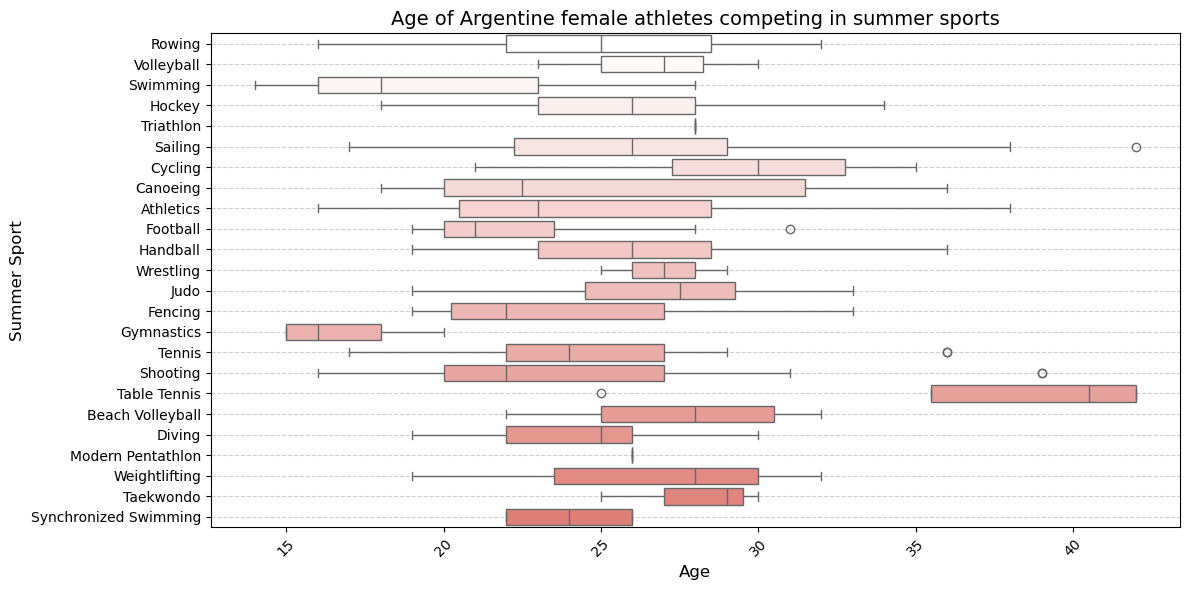

<Figure size 640x480 with 0 Axes>

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo atletas femeninas argentinas en deportes de verano
summer_female_athletes_arg = female_athletes_arg[female_athletes_arg['Season'] == 'Summer']

# Obtener una lista de deportes únicos
unique_sports = summer_female_athletes_arg['Sport'].unique()

# Crear un gradiente basado en F07167 con tantos colores como deportes únicos
base_color = '#F07167'
colors = LinearSegmentedColormap.from_list('custom', ['#FFFFFF', base_color])(np.linspace(0, 1, len(unique_sports)))

# Crear un mapeo deporte-color
sport_palette = dict(zip(unique_sports, colors))

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=summer_female_athletes_arg,
    x='Age',
    y='Sport',
    palette=sport_palette
)

# Personalizar el gráfico
plt.title('Age of Argentine female athletes competing in summer sports', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Summer Sport', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
plt.savefig('bloxplot.png', bbox_inches='tight')

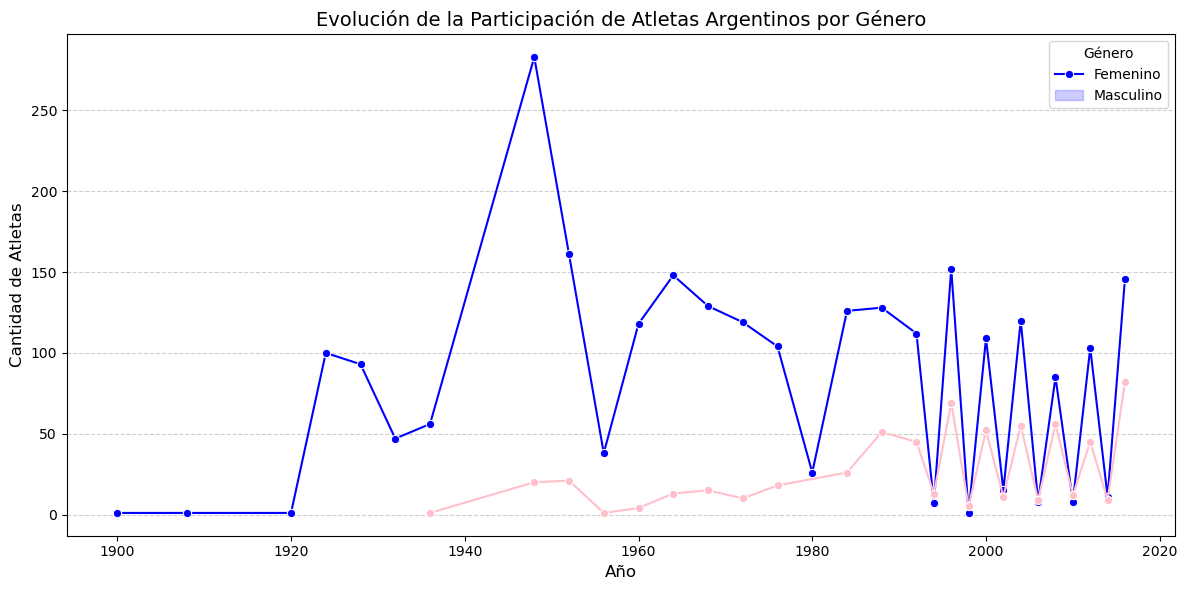

In [42]:
# Filtrar atletas argentinos
argentine_athletes = athletes[athletes['Team'] == 'Argentina']

# Agrupar por año y género, y contar la cantidad de atletas
gender_evolution = argentine_athletes.groupby(['Year', 'Sex']).size().reset_index(name='count')

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=gender_evolution,
    x='Year',
    y='count',
    hue='Sex',
    marker='o',
    palette={'M': 'blue', 'F': 'pink'}
)

# Personalizar el gráfico
plt.title('Evolución de la Participación de Atletas Argentinos por Género', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Atletas', fontsize=12)
plt.legend(title='Género', labels=['Femenino', 'Masculino'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [46]:
# Filtrar atletas argentinos
argentine_athletes = athletes[athletes['Team'] == 'Argentina']

# Especificar el año deseado
selected_year = 1996

# Filtrar por el año seleccionado
athletes_in_year = argentine_athletes[argentine_athletes['Year'] == selected_year]

# Calcular la cantidad total de atletas
total_athletes = athletes_in_year.shape[0]

print(f"La cantidad de atletas argentinos que participaron en el año {selected_year} es: {total_athletes}")

La cantidad de atletas argentinos que participaron en el año 1996 es: 221


In [51]:
# Filtrar a los atletas argentinos que ganaron medallas
athletes_argentina_medals = athletes[athletes['Medal'].notna()]

# Contar el total de atletas que ganaron medallas
total_medals_winners = athletes_argentina_medals.shape[0]

# Contar cuántos hombres y cuántas mujeres ganaron medallas
men_with_medals = athletes_argentina_medals[athletes_argentina_medals['Sex'] == 'M'].shape[0]
women_with_medals = athletes_argentina_medals[athletes_argentina_medals['Sex'] == 'F'].shape[0]

# Calcular los porcentajes de hombres y mujeres
men_percentage = (men_with_medals / total_medals_winners) * 100
women_percentage = (women_with_medals / total_medals_winners) * 100

# Mostrar los resultados
print(f"Percentage of Argentine men with medals: {men_percentage:.2f}%")
print(f"Percentage of Argentine women with medals: {women_percentage:.2f}%")



Percentage of Argentine men with medals: 71.71%
Percentage of Argentine women with medals: 28.29%


In [52]:
# Filtrar los atletas de Argentina
athletes_argentina = athletes[athletes['Team'] == 'Argentina']

# Filtrar los atletas de América del Sur
south_american_teams = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
    'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 
    'Uruguay', 'Venezuela'
]
athletes_south_america = athletes[athletes['Team'].isin(south_american_teams)]

# Calcular el número de atletas argentinos y el total de atletas de América del Sur
athletes_argentina_count = athletes_argentina.shape[0]
athletes_south_america_count = athletes_south_america.shape[0]

# Calcular el porcentaje de participación de Argentina
participation_percentage = (athletes_argentina_count / athletes_south_america_count) * 100

# Mostrar el resultado
print(f"Percentage of Argentine athletes in South America: {participation_percentage:.2f}%")


Percentage of Argentine athletes in South America: 27.29%


In [5]:
# Filtrar atletas mujeres argentinas en deportes de verano
female_argentina_summer = athletes[
    (athletes['Team'] == 'Argentina') &
    (athletes['Sex'] == 'F') &
    (athletes['Season'] == 'Summer')
]

# Calcular el promedio de edad
average_age_female_summer = female_argentina_summer['Age'].mean()

# Mostrar el resultado
print(f"The average age of Argentine female athletes in Summer sports is: {average_age_female_summer:.2f} years")


The average age of Argentine female athletes in Summer sports is: 23.73 years
